# **Modelos Regularizados**
---
### **Ridge Regression**
* Emplea la norma L2. 
* Manejo de varianza y colinealidad.
* Se emplea cuando se sobreentrena un modelo.

### **Lasso Regression**
* Emplea la penalización L1.
* Selección de caracerísticas automática.
* Se emplea cuando se sospecha que existen características inútiles.

### **Elastic-Net**
* Combinación de Ridge y Lasso.
* Ofrece un *trade-off* de bias y varianza.
* Se emplea cuando más características inútiles que muestras o hay mucha correlación entre ellas.

# **Entrenamiento**
---
### **Cross-validation**

### **GridSearch**
1. Definir parámetros
    * `parameters = [{"alpha":[1,10,100,1000], "normalize": [True, False]}]`
2. Definir modelo
    * `RR = Ridge()`
3. Definir GridSearch
    * `grid = GridSearchCV(RR, parameters, cv=4)`
4. Entrenar el modelo
    * `grid.fit(X, y)`
5. Mejor estimador
    * `grid.best_estimator_`
6. Resultados
    * `scores = grid.cv_results`
    * `scores["mean_test_score"]`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv')
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [8]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## **1. Training and Test**

In [11]:
y_data = df["price"]

In [13]:
x_data = df.drop(columns=["price"])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

len(X_train), len(X_test)

(160, 41)

In [16]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

len(X_train1), len(X_test1)

(120, 81)

In [17]:
from sklearn.linear_model import LinearRegression

lre = LinearRegression()

lre.fit(X_train[['horsepower']], y_train)

lre.score(X_test[['horsepower']], y_test)

0.6232540189833459

In [19]:
lre.score(X_train[['horsepower']], y_train)

0.6423115922166707

In [20]:
lre1 = LinearRegression()

lre1.fit(X_train1[['horsepower']], y_train1)

lre1.score(X_test1[['horsepower']], y_test1)

0.7139364665406973

## **2. Cross-Validation Score**

In [21]:
from sklearn.model_selection import cross_val_score

In [29]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [23]:
print("La media de los folds es", Rcross.mean(), "y la desviación estándar es ", Rcross.std())

La media de los folds es 0.522009915042119 y la desviación estándar es  0.2911839444756029


In [30]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross

array([0.59015621, 0.44319613])

In [31]:
Rcross.mean()

0.5166761697127429

In [33]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## **3. Overfitting, Underfitting and Model Selection**
---

In [34]:
lr = LinearRegression()

lr.fit(X_train[["horsepower","curb-weight","engine-size","highway-mpg"]], y_train)

LinearRegression()

In [37]:
yhat_train = lr.predict(X_train[["horsepower","curb-weight","engine-size","highway-mpg"]])
yhat_train[:5]

array([19718.6209773 ,  9903.17925222,  6254.6370579 , 16975.91723187,
       15983.78419375])

In [38]:
yhat_test = lr.predict(X_test[["horsepower","curb-weight","engine-size","highway-mpg"]])
yhat_train[:5]

array([19718.6209773 ,  9903.17925222,  6254.6370579 , 16975.91723187,
       15983.78419375])

In [39]:
import seaborn as sns

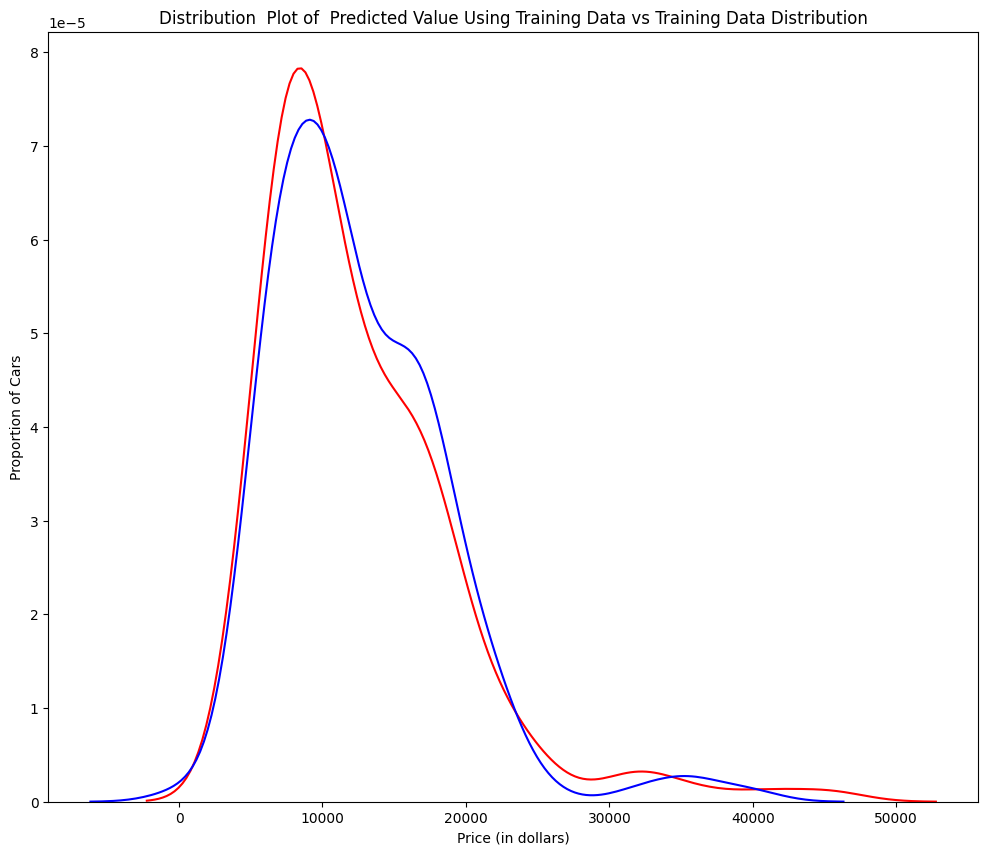

In [40]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

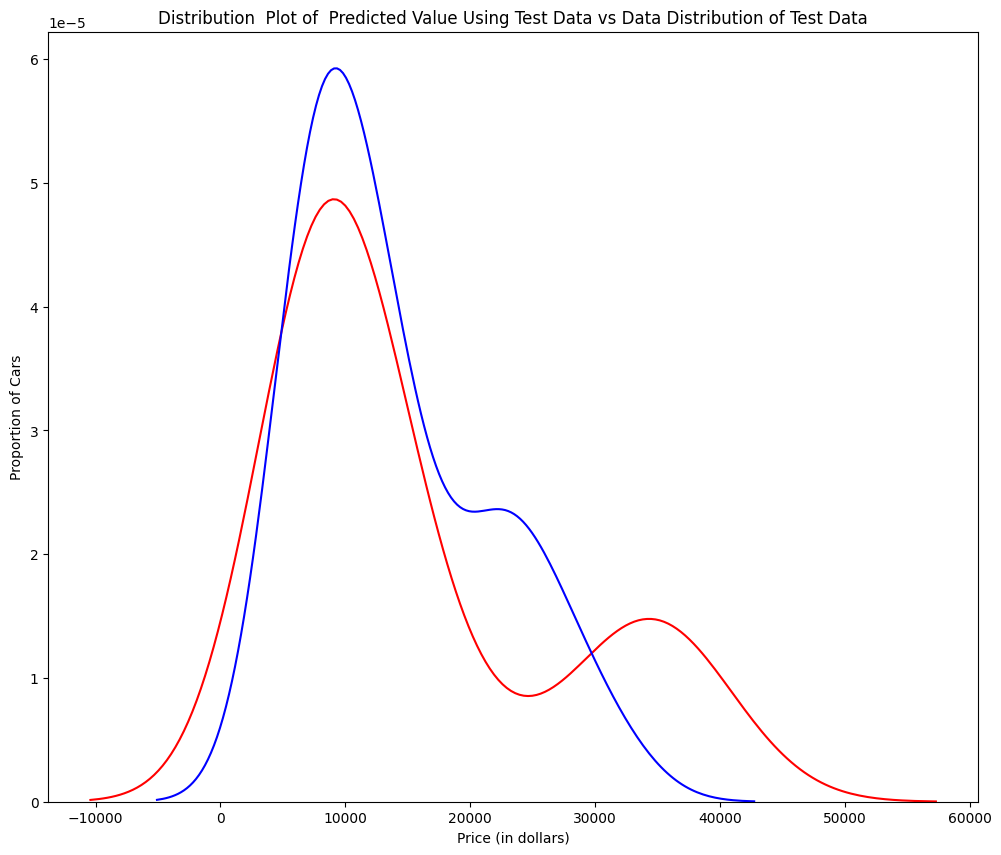

In [41]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0) 

In [43]:
pr = PolynomialFeatures(degree=5)

X_train_pr = pr.fit_transform(X_train[['horsepower']])
X_test_pr = pr.fit_transform(X_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [44]:
poly = LinearRegression()
poly.fit(X_train_pr, y_train)

LinearRegression()

In [45]:
yhat = poly.predict(X_test_pr)

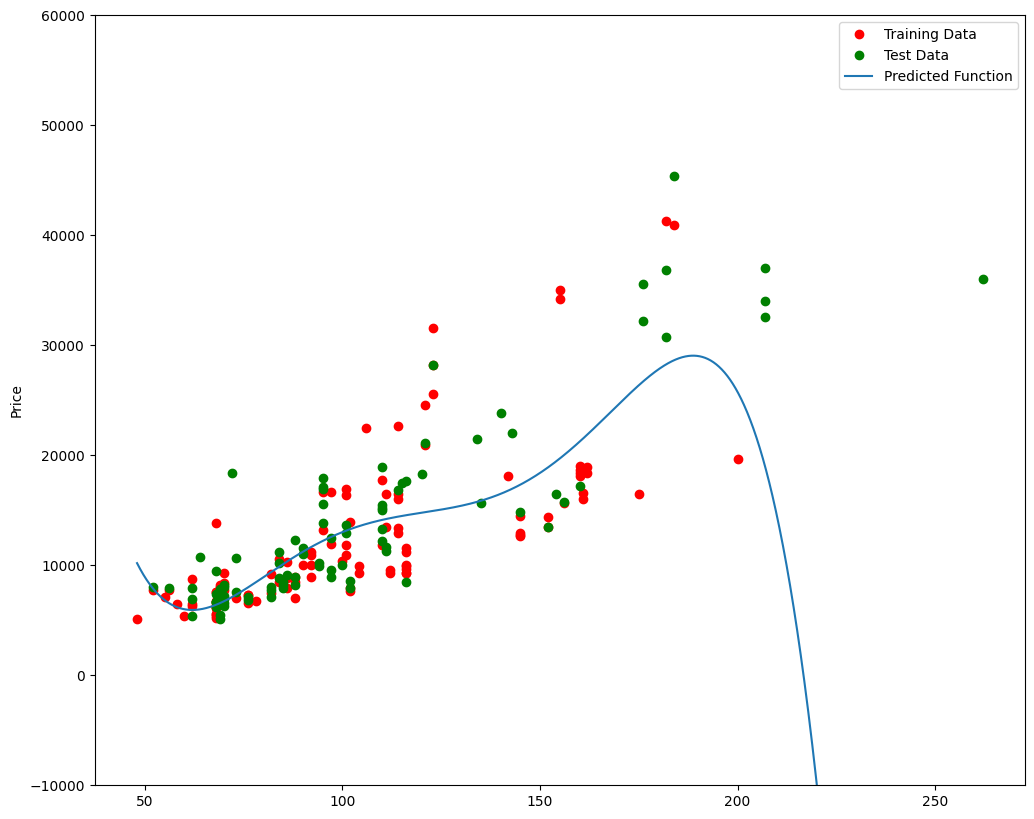

In [47]:
PollyPlot(X_train['horsepower'], X_test['horsepower'], y_train, y_test, poly,pr)

In [48]:
poly.score(X_test_pr, y_test)

-29.87134054062532

In [66]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(X_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(X_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

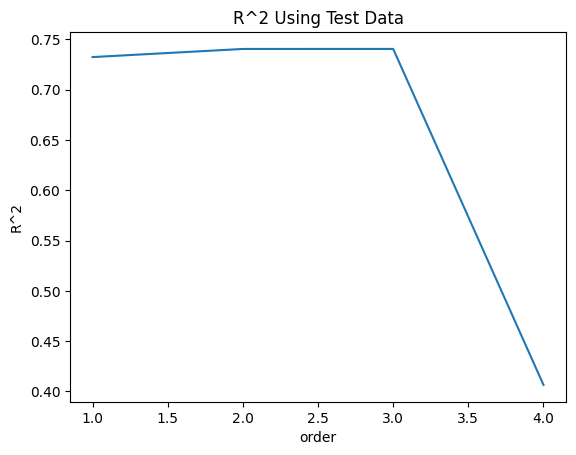

In [67]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.show()

In [68]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [69]:
interact(f, order=(0,6,1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [75]:
## **4. Ridge Regression**

In [76]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(X_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [79]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=1)
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [80]:
yhat = RidgeModel.predict(x_test_pr)

In [81]:
yhat[:4], y_test[:4]

(array([ 6570.82441941,  9636.24891471, 20949.92322737, 19403.60313256]),
 18      6295.0
 170    10698.0
 107    13860.0
 98     13499.0
 Name: price, dtype: float64)

In [82]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:05<00:00, 175.95it/s, Test Score=0.564, Train Score=0.859]


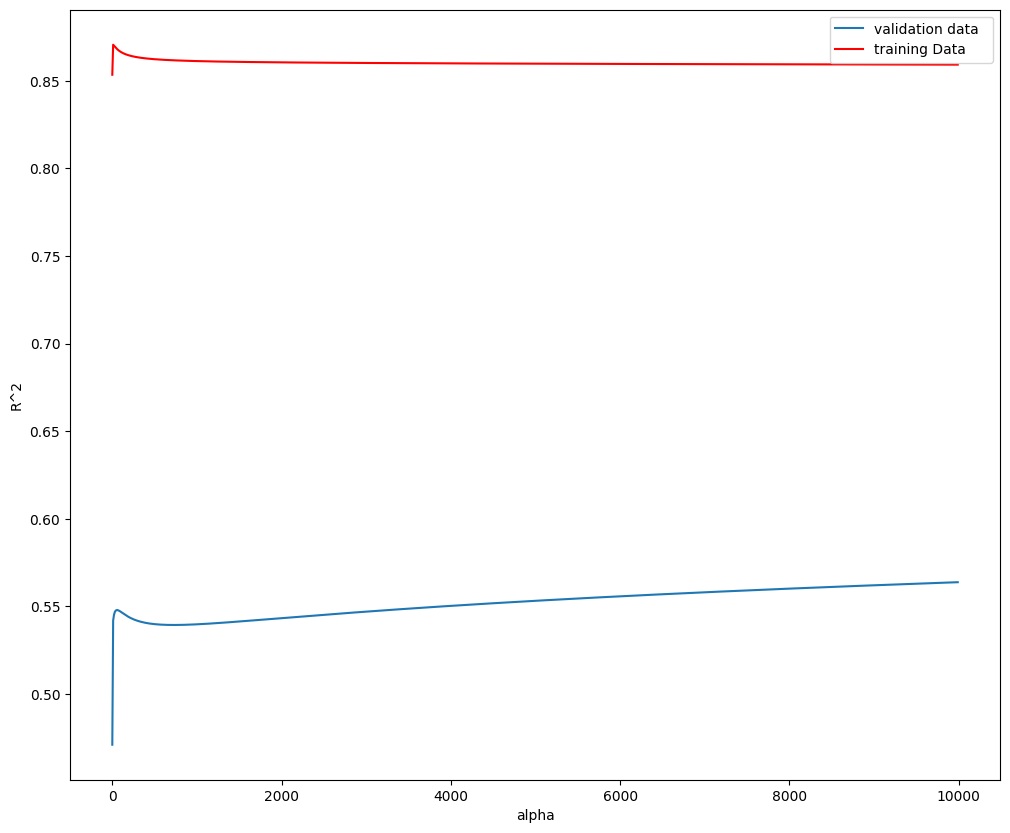

In [83]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

## **5. Grid Search**

In [84]:
from sklearn.model_selection import GridSearchCV

parameters = [{"alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

RR = Ridge()

grid_search = GridSearchCV(RR, parameters, cv=4)

In [89]:
grid_search.fit(x_train_pr, y_train)

C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.39159e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.40995e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.2515e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.46361e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [90]:
bestRR = grid_search.best_estimator_

In [88]:
bestRR.score(x_test_pr, y_test)

0.611963018672373

In [91]:
best_alpha = grid_search.best_params_['alpha']
best_rr = Ridge(alpha = best_alpha)
best_rr.fit(X_train_pr, y_train)
best_rr.score(X_test_pr, y_test)

0.6231632399194444